In [1]:
from sklearn.model_selection import train_test_split
from orbit.utils.dataset import load_m3monthly
import numpy as np
from PyEMD import EMD, Visualisation
import pandas as pd
import pylab as plt

def load_m3_data(min_length=100, n_set=1500):
    datasets = dict()
    m3_data = load_m3monthly()
    keys = m3_data['key'].unique().tolist()

    print('Loading M3 dataset')
    for key in keys:
        current = m3_data[m3_data['key'] == key]
        if current.shape[0] > min_length:
            datasets[key] = current['value'].to_numpy()
            if len(datasets.keys()) == n_set:
                break

    print(f'Get {len(datasets)} datasets with length > {min_length}')
    return datasets

In [2]:
data = load_m3_data(min_length=100,n_set=1500)
data = pd.DataFrame(data['N2776'],columns=['N2776'])

Loading M3 dataset
Get 1043 datasets with length > 100


In [3]:
train,test = train_test_split(data,test_size=int(len(data)*0.2),shuffle=False)

t_train = np.arange(0, train.shape[0], 1)
emd_train = EMD()
emd_train.emd(np.array(train).ravel())
imfs_train, res_train = emd_train.get_imfs_and_residue()

In [4]:
t = np.arange(0, data.shape[0], 1)
emd = EMD()
emd.emd(np.array(data).ravel())
imfs, res = emd.get_imfs_and_residue()

##### Plot Decomposition Figure

In [5]:
PLOT_WIDTH = 7
PLOT_HEIGHT_PER_IMF = 2
num_rows, t_length = imfs.shape
num_rows += 2

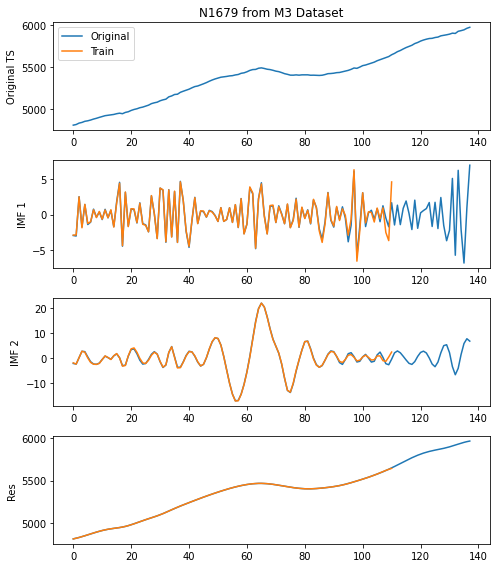

In [6]:
fig, axes = plt.subplots(num_rows, 1, figsize=(PLOT_WIDTH, num_rows * PLOT_HEIGHT_PER_IMF))
axes[0].set_title("N1679 from M3 Dataset")
ax_ori = axes[0]

ax_ori.plot(t,data)
ax_ori.plot(t_train[0:1],train[0:1])

ax_ori.set_ylabel('Original TS')
for num, imf in enumerate(imfs):
    ax = axes[num+1]
    ax.plot(t, imf,label = 'Original')
    ax.set_ylabel("IMF " + str(num + 1))
    # ax.legend()
for num, imf_train in enumerate(imfs_train):
    ax = axes[num+1]
    ax.plot(t_train, imf_train,label='Training')
    # ax.set_ylabel("IMF " + str(num + 1))
ax_ori.legend(['Original', 'Train'])


ax = axes[-1]
ax.plot(t, res)
ax.plot(t_train,res_train)
ax.set_ylabel("Res")
plt.tight_layout()

In [7]:
def emd_tranf(train_data):
    # generate IMFs from CEEMDAN decomposition
    emd = EMD() 
    emd.emd(np.array(train_data).ravel(),max_imf=4)
    imfs, res = emd.get_imfs_and_residue() # Extract cimfs and residue
    imfs = pd.DataFrame(imfs).T
    res = pd.DataFrame(res)
    imfs_df = pd.concat([imfs,res],axis=1)

    residual = imfs_df.iloc[:,1:].sum(axis=1)

    return residual

In [8]:
datas = load_m3_data(min_length=100,n_set=5)

Loading M3 dataset
Get 5 datasets with length > 100


<function matplotlib.pyplot.legend(*args, **kwargs)>

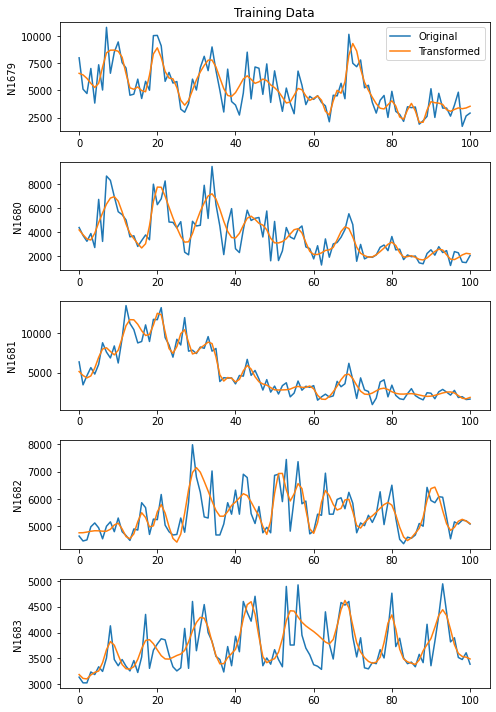

In [9]:
fig, axes = plt.subplots(5, 1, figsize=(PLOT_WIDTH, 5 * PLOT_HEIGHT_PER_IMF))
axes[0].set_title("Training Data")
num = 0
for key in datas.keys():
    data = datas[key]
    
    train,test = train_test_split(data,test_size=int(len(data)*0.2),shuffle=False)
    trans = emd_tranf(train)
    ax = axes[num]
    ax.set_ylabel(key)
    ax.plot(train,label='Original')
    ax.plot(trans,label='Transformed')
    if key == 'N1679':
        ax.legend()
    num += 1
plt.tight_layout()
plt.legend